Summarize: So far we have two files, 1.- tickers, securities and sectors and 2.- the corresponding data. 
With so many components and such strict criteria for a company to qualify for the index, the S&P 500 is dynamic. S&P Dow Jones Indices determines the components of the index, has little patience for slackers.
According to a study by McKinsey, the average lifespan of a company will be 16 years by 2021. The study also states that by 2027 (four years from now), 75% of the companies currently in the index will be gone.

Sometimes a company buys a company it replaces on the index, or spins off a large part of itself. Other companies leave the list when they can no longer meet the market capitalization requirement. When this happens, the company is usually relegated to the index from which its replacement was promoted.

For this reason, some stocks have missing values in the data, which can be treated in different scenarios.

1.- Replace the values with some large number and consider them as outliers.
2.- Interpolate or simulate the missing values as a stochastic process of a sample or simulate all of them.
3.- Remove data with missing values as long as the removed data is small compared to the total data.

I'll show how to do the third option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy


In [41]:
path = 'your_path'

In [3]:
df = pd.read_csv(filepath_or_buffer = path, index_col = 0)

Our data consist of 502 stock prices throughout 1510 days, from 01/03/2017 to 30/12/2017. The data is sortered alphabetically by ticker. 

The goal is to remove the missing values and to soter the data by sectors.

In [4]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.210854,44.741238,158.060913,27.095850,46.856438,74.368439,34.819309,28.629999,105.362434,103.480003,...,80.849014,33.642067,66.233269,55.251984,45.868374,56.340511,95.412949,86.250000,36.360283,51.360584
2017-01-04,44.790955,45.127754,159.358002,27.065521,47.517124,76.213921,35.095722,28.833332,105.615738,104.139999,...,83.455849,33.791142,65.504532,55.704407,46.552013,56.545506,96.290176,87.029999,36.882374,51.858959
2017-01-05,44.258396,44.345032,159.246826,27.203157,47.877510,75.331688,35.398888,28.540001,104.032501,105.910004,...,84.528152,33.791142,64.528061,54.978649,46.127056,56.732689,96.908829,84.750000,36.284512,51.686447
2017-01-06,45.637299,44.654259,157.162216,27.506430,47.892517,76.339951,36.361874,28.823334,105.217690,108.300003,...,85.443336,33.890518,64.491638,54.940945,45.803726,57.419003,96.918068,85.959999,36.520290,51.849373
2017-01-09,45.779968,45.494976,157.069534,27.758369,48.207855,76.952110,36.326218,28.406668,104.041550,108.570000,...,85.739151,33.377033,63.427692,55.110611,45.609703,57.579441,98.801773,85.970001,36.124508,51.705624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.481873,12.710000,141.508774,131.477127,160.091415,169.002655,107.156876,63.380001,263.969421,338.450012,...,80.537010,69.309738,106.922302,31.472191,109.027458,127.713448,126.238785,248.220001,47.243732,145.106659
2022-12-27,148.800293,12.530000,143.227280,129.652435,159.983459,167.998657,107.543190,63.619999,263.195648,335.089996,...,84.138832,69.935120,108.407875,31.709494,110.011108,128.704239,126.826675,251.000000,47.624023,144.648743
2022-12-28,147.347595,12.320000,143.503815,125.674019,159.237457,166.368378,106.810188,62.599998,261.023102,328.329987,...,79.908440,69.431381,106.627151,30.631746,108.242508,128.119675,125.541275,246.839996,46.775681,143.185333


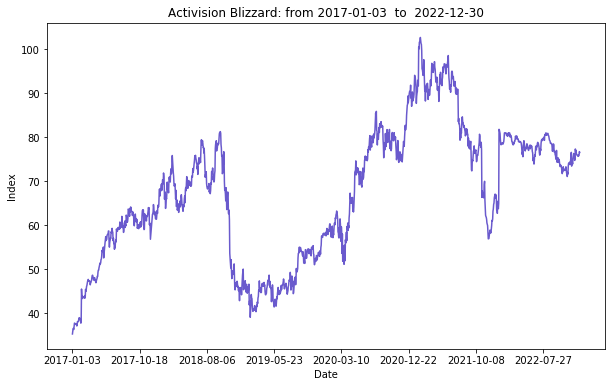

In [9]:
ax = df['ATVI'].plot(title = 'Activision Blizzard: from ' + str(df.index.values[0]) + '  to  ' + str(df.index.values[-1]),
                            figsize = (10,6), color = 'slateblue')
ax.set_ylabel('Index')
plt.show()

Companies with 'Nan' values.

In [10]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


CARR     807
CDAY     330
CEG     1270
CTVA     601
DOW      555
FOX      550
FOXA     549
GEHC    1499
INVH      20
IR        90
MRNA     486
OGN     1098
OTIS     807
VICI     251
dtype: int64

In [11]:
n_c = list(null_columns) 
print(n_c)

['CARR', 'CDAY', 'CEG', 'CTVA', 'DOW', 'FOX', 'FOXA', 'GEHC', 'INVH', 'IR', 'MRNA', 'OGN', 'OTIS', 'VICI']


In [16]:
print('No. companies with missing values:', len(n_c) )
print('New total:', df.shape[1]  - len(n_c))
print('Missing data:', '{:.2f}'.format(len(n_c)/df.shape[1]*100 ), '%')

No. companies with missing values: 14
New total: 488
% - Missing data: 2.79 %


In [17]:
df_sp = pd.read_csv(filepath_or_buffer = 'C:\\Users\\Ale\\Documents\\ML\\Notebooks\\tickers.txt', 
                    index_col = False
                   )

In [18]:
df_sp

,Symbol,Security,Sector
0,ATVI,Activision Blizzard,Communication Services
1,GOOGL,Alphabet Inc- (Class A),Communication Services
2,GOOG,Alphabet Inc- (Class C),Communication Services
3,T,AT&T,Communication Services
4,CHTR,Charter Communications,Communication Services
...,...,...,...
497,PEG,Public Service Enterprise Group,Utilities
498,SRE,Sempra Energy,Utilities
499,SO,Southern Company,Utilities
500,WEC,WEC Energy Group,Utilities


Removing these companies for the symbols, security and sector file and saving it as a new file.

In [19]:
df_sp1 = copy.copy(df_sp) 

In [20]:
df_sp1 = df_sp[df_sp['Symbol'].str.contains('|'.join(n_c)) == False]


In [21]:
df_sp1

,Symbol,Security,Sector
0,ATVI,Activision Blizzard,Communication Services
1,GOOGL,Alphabet Inc- (Class A),Communication Services
2,GOOG,Alphabet Inc- (Class C),Communication Services
3,T,AT&T,Communication Services
4,CHTR,Charter Communications,Communication Services
...,...,...,...
497,PEG,Public Service Enterprise Group,Utilities
498,SRE,Sempra Energy,Utilities
499,SO,Southern Company,Utilities
500,WEC,WEC Energy Group,Utilities


Saving the new file

In [40]:
#df_sp1.to_csv(path_or_buf = 'your_path', index = False)

In [23]:
#print(df_sp['Symbol'].to_list())

Checking if some companies still have missing values, if the list is empty then we can continue

In [24]:
df1 = copy.copy(df) 

In [25]:
df2 = df1.drop(n_c,axis=1) #The companies, columns, has been removed

In [26]:
null_columns2=df2.columns[df2.isnull().any()]
df2[null_columns2].isnull().sum() #This outcome shall be a empty objext

Series([], dtype: float64)

In [27]:
df2

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.210854,44.741238,158.060913,27.095850,46.856438,74.368439,34.819309,28.629999,105.362434,103.480003,...,80.849014,33.642067,66.233269,55.251984,45.868374,56.340511,95.412949,86.250000,36.360283,51.360584
2017-01-04,44.790955,45.127754,159.358002,27.065521,47.517124,76.213921,35.095722,28.833332,105.615738,104.139999,...,83.455849,33.791142,65.504532,55.704407,46.552013,56.545506,96.290176,87.029999,36.882374,51.858959
2017-01-05,44.258396,44.345032,159.246826,27.203157,47.877510,75.331688,35.398888,28.540001,104.032501,105.910004,...,84.528152,33.791142,64.528061,54.978649,46.127056,56.732689,96.908829,84.750000,36.284512,51.686447
2017-01-06,45.637299,44.654259,157.162216,27.506430,47.892517,76.339951,36.361874,28.823334,105.217690,108.300003,...,85.443336,33.890518,64.491638,54.940945,45.803726,57.419003,96.918068,85.959999,36.520290,51.849373
2017-01-09,45.779968,45.494976,157.069534,27.758369,48.207855,76.952110,36.326218,28.406668,104.041550,108.570000,...,85.739151,33.377033,63.427692,55.110611,45.609703,57.579441,98.801773,85.970001,36.124508,51.705624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.481873,12.710000,141.508774,131.477127,160.091415,169.002655,107.156876,63.380001,263.969421,338.450012,...,80.537010,69.309738,106.922302,31.472191,109.027458,127.713448,126.238785,248.220001,47.243732,145.106659
2022-12-27,148.800293,12.530000,143.227280,129.652435,159.983459,167.998657,107.543190,63.619999,263.195648,335.089996,...,84.138832,69.935120,108.407875,31.709494,110.011108,128.704239,126.826675,251.000000,47.624023,144.648743
2022-12-28,147.347595,12.320000,143.503815,125.674019,159.237457,166.368378,106.810188,62.599998,261.023102,328.329987,...,79.908440,69.431381,106.627151,30.631746,108.242508,128.119675,125.541275,246.839996,46.775681,143.185333


In [52]:
#df2.to_csv(path_or_buf = 'your_path')

In [58]:
#dfsorted = pd.read_csv(filepath_or_buffer = 'your_path', 
#                    index_col = 0
#                   )

Sort the data by sectors

In [28]:
#df_sorted_data = dfsorted[df_sp1['Symbol'].to_list()]
df_sorted_data = df2[df_sp1['Symbol'].to_list()]

In [29]:
df_sorted_data

,ATVI,GOOGL,GOOG,T,CHTR,CMCSA,DIS,EA,IPG,LYV,...,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,35.324673,40.400501,39.306999,19.597080,285.769989,29.948645,101.584351,77.979095,18.312323,27.400000,...,18.013052,10.704043,58.993301,60.147591,24.831367,34.647018,82.346313,36.846867,47.914570,33.642067
2017-01-04,36.018826,40.388500,39.345001,19.483198,291.549988,30.304298,102.886711,79.417122,18.405783,27.629999,...,18.151052,11.339323,59.208286,60.482086,24.882446,34.886570,83.054749,36.809292,48.283199,33.791142
2017-01-05,36.578007,40.651001,39.701000,19.428530,296.170013,30.425745,102.829262,77.772255,17.992960,27.500000,...,18.410810,11.556886,59.159428,60.979954,25.028389,34.942459,82.859337,36.921997,48.348736,33.791142
2017-01-06,36.549080,41.260502,40.307499,19.113415,298.160004,30.477777,104.361458,77.821503,18.413574,27.680000,...,18.151052,11.626509,59.823917,61.057743,25.218105,35.293816,83.803856,36.824318,48.152138,33.890518
2017-01-09,36.346622,41.359001,40.332500,18.872875,296.260010,30.720675,103.767731,77.457069,18.312323,27.290001,...,17.907526,11.722235,58.924896,60.077591,24.970009,34.750828,82.549896,36.463673,47.496780,33.377033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,75.949997,89.230003,89.809998,17.796965,333.920013,34.361145,88.010002,121.120430,32.866215,70.690002,...,27.213705,31.200432,16.059999,76.182541,29.017178,59.940468,155.198395,70.333511,93.907799,69.309738
2022-12-27,75.790001,87.389999,87.930000,17.942762,332.790009,34.224251,86.370003,120.432632,33.043232,69.589996,...,27.302094,31.523094,16.450001,75.967476,29.164522,60.656849,156.270767,70.853127,94.429070,69.935120
2022-12-28,76.050003,86.019997,86.459999,17.709488,332.339996,33.852673,84.169998,119.156746,32.374500,68.160004,...,27.056572,31.151543,16.160000,75.087654,28.918947,60.146549,153.791534,70.245285,93.504555,69.431381


Save the final file:

In [57]:
#df_sorted_data.to_csv(path_or_buf = 'your_path')

In [30]:
sp = df_sorted_data.T.values

In [31]:
sp

array([[35.3246727 , 36.01882553, 36.57800674, ..., 76.05000305,
        76.76000214, 76.55000305],
       [40.40050125, 40.38850021, 40.65100098, ..., 86.01999664,
        88.44999695, 88.23000336],
       [39.30699921, 39.34500122, 39.70100021, ..., 86.45999908,
        88.94999695, 88.73000336],
       ...,
       [36.84686661, 36.80929184, 36.92199707, ..., 70.24528503,
        70.77469635, 70.00999451],
       [47.91456985, 48.28319931, 48.34873581, ..., 93.50455475,
        93.83895874, 92.21612549],
       [33.64206696, 33.79114151, 33.79114151, ..., 69.43138123,
        69.92331696, 68.97880554]])

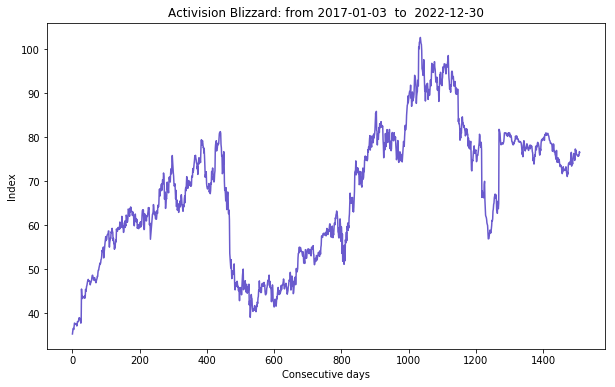

In [39]:
plt.figure(figsize = (10,6))
plt.plot(sp[0], color = 'slateblue')
plt.title('Activision Blizzard: from ' + str(df.index.values[0]) + '  to  ' + str(df.index.values[-1]))
plt.xlabel('Consecutive days')
plt.ylabel('Index')
plt.show()